## Overview:-
This project segments customers
based on their purchasing behavior to
identify different target groups. It
demonstrates skills in data analysis,
clustering, and visualization using Power BI.

## Dataset:- https://www.kaggle.com/datasets/dp1224/customer-segments-data


## Gather Data:-
Use a customer dataset that includes
columns such as name, age, gender, education, income, country,
purchase frequency, and spending score.



## 📚 Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

## 📂 Read Data: Loading and Inspecting the Dataset

In [ ]:
df = pd.read_csv('customer_data.csv')

In [ ]:
df.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [ ]:
df.shape

(1000, 8)

# ℹ️ Data Information: Understanding the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


## 📶Statical Information About Data




In [ ]:
df.describe()

,age,income,purchase_frequency,spending
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.754000,59277.852000,0.554600,9613.296835
std,13.778582,23258.377128,0.284675,5484.707210
min,18.000000,20031.000000,0.100000,611.985000
25%,30.000000,38825.500000,0.300000,5020.425000
50%,42.000000,58972.000000,0.600000,9430.395000
75%,54.000000,79114.000000,0.800000,13645.507500
max,65.000000,99780.000000,1.000000,25546.500000


In [ ]:
df.dtypes

,0
name,object
age,int64
gender,object
education,object
income,int64
country,object
purchase_frequency,float64
spending,float64


In [ ]:
df.isnull().sum()

,0
name,0
age,0
gender,0
education,0
income,0
country,0
purchase_frequency,0
spending,0


# 📊 Data Visualization:
Analyzing the data to understand customer
characteristics and prepare it for clustering.



# 📈 Distplot: Analyzing Univariate Distributions

<ipython-input-39-6e851238b3c4>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
<ipython-input-39-6e851238b3c4>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 20)
<ipython-input-39-6e851238b3c4>:7: UserWarning: 

`distplot` is a deprecated function and will b

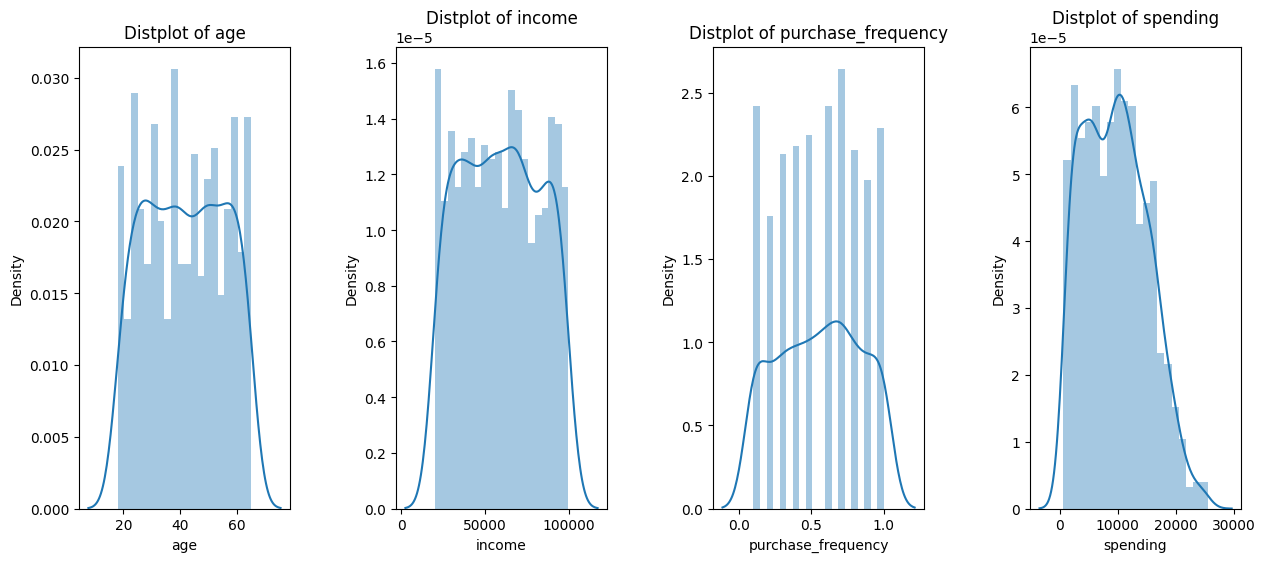

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['age' , 'income' , 'purchase_frequency', 'spending']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

# 📊 Hist Plot: Check how spending scores are distributed.

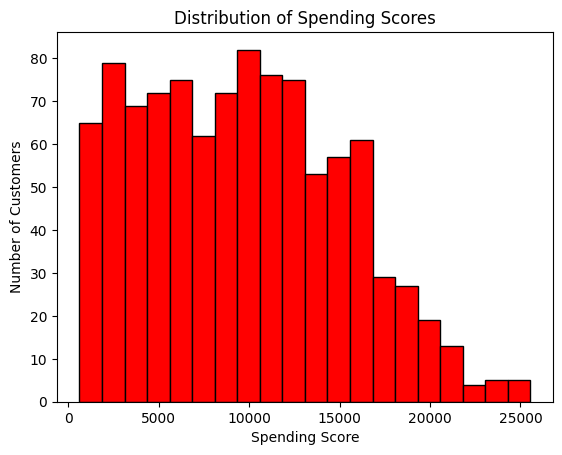

In [ ]:
plt.hist(df['spending'], bins=20,
                         color = 'red',
                         edgecolor = 'black')
plt.title('Distribution of Spending Scores')
plt.xlabel('Spending Score')
plt.ylabel('Number of Customers')
plt.show()

# 📊 Count Plot: Analyzing Categorical Variables

<Axes: xlabel='gender', ylabel='count'>

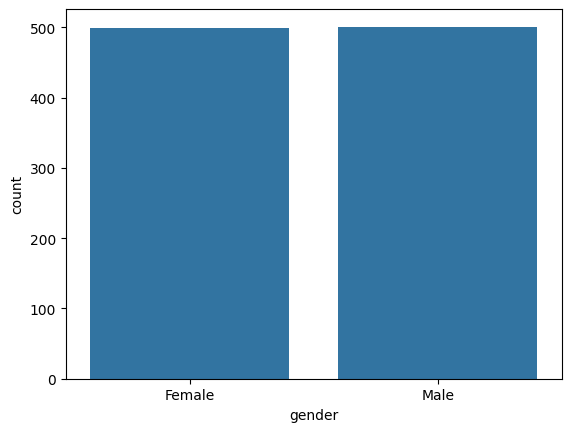

In [ ]:
sns.countplot(data=df,x='gender')


(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

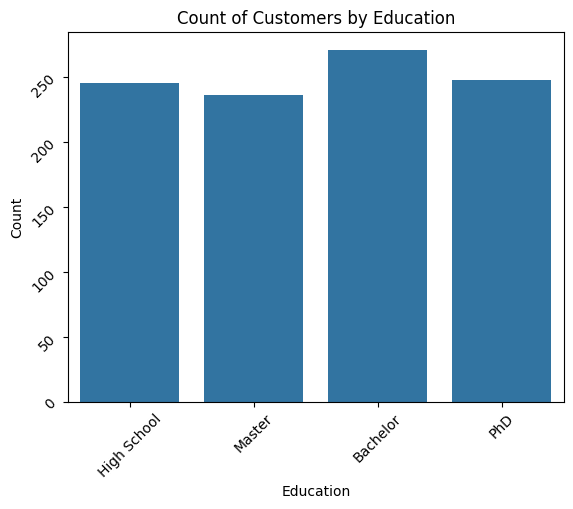

In [ ]:
sns.countplot(x='education', data=df)
plt.title('Count of Customers by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# 🌟 Scatter Plot: Visualizing Relationships between Variables

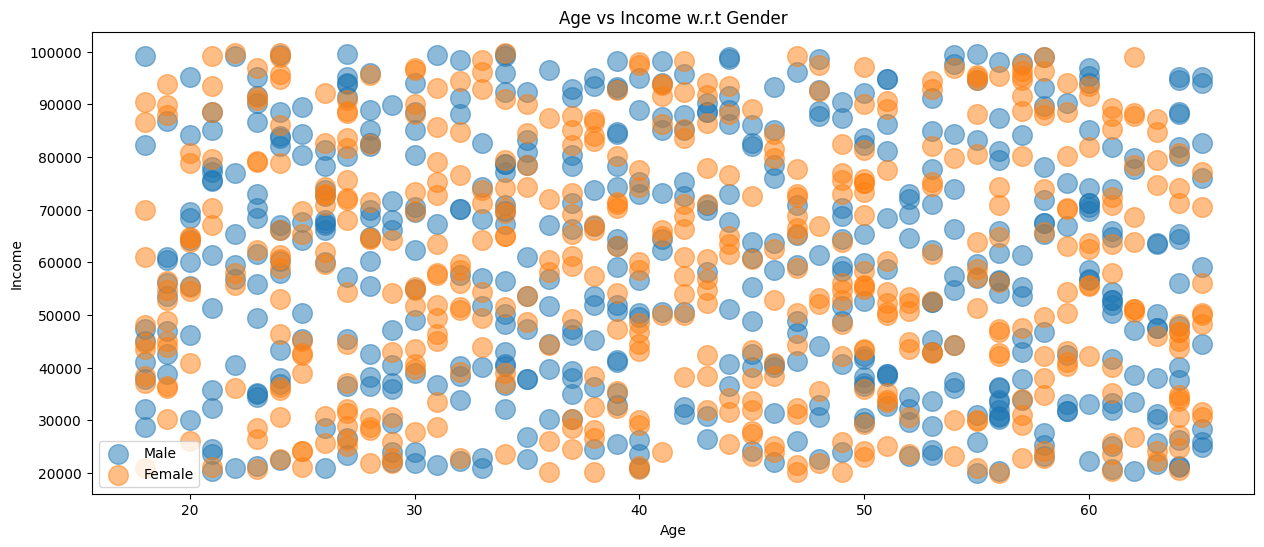

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'age' , y = 'income' , data = df[df['gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Income')
plt.title('Age vs Income w.r.t Gender')
plt.legend()
plt.show()

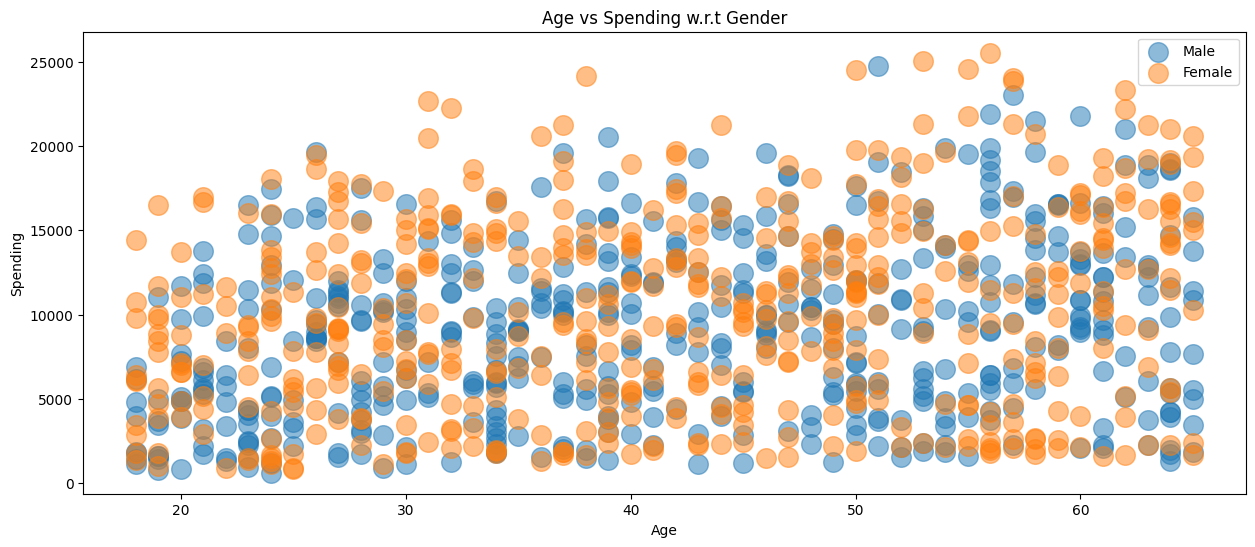

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'age' , y = 'spending' , data = df[df['gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Spending')
plt.title('Age vs Spending w.r.t Gender')
plt.legend()
plt.show()

# 🌐 Pairplot: Visualizing Multivariate *Relationships*

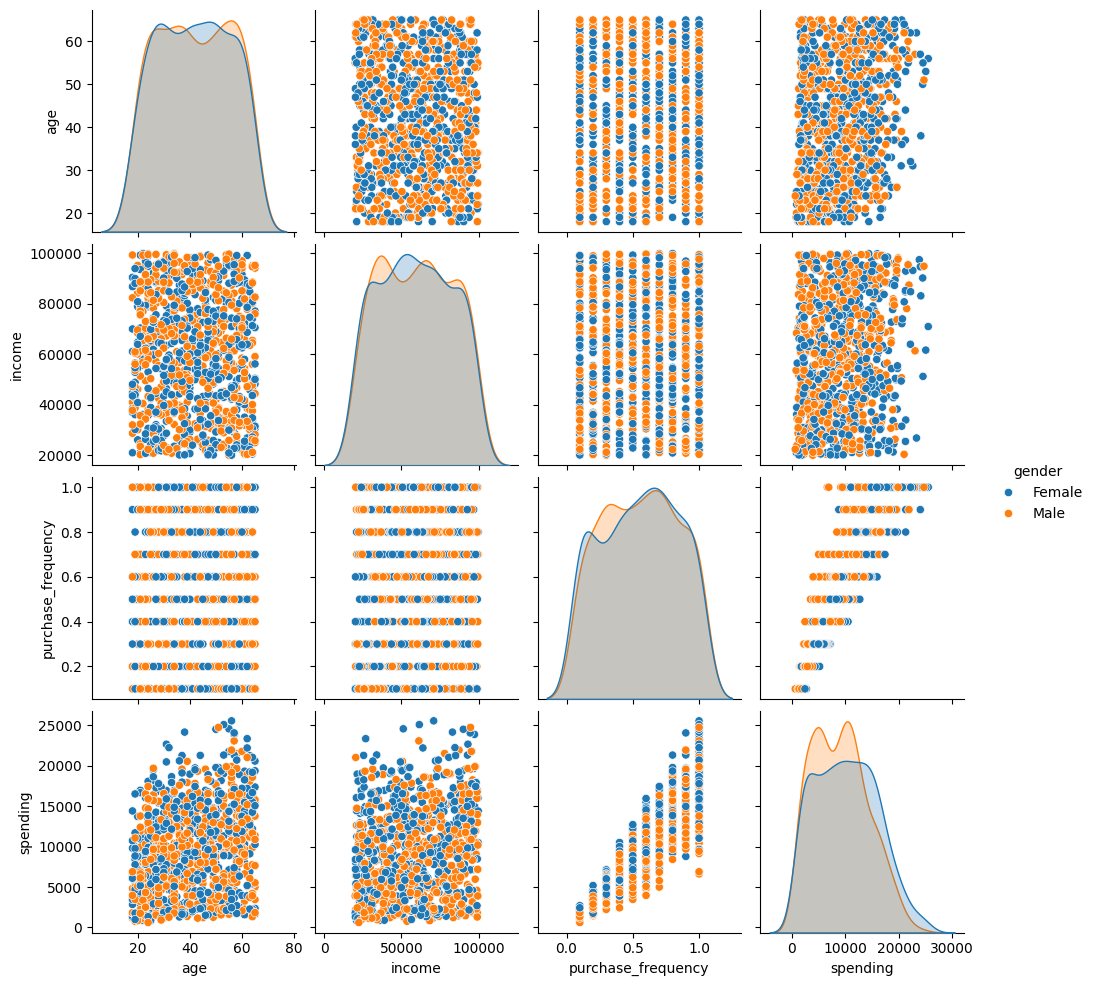

In [ ]:
sns.pairplot(df,hue='gender')


# 🎻 Violin Plot: Displaying Data Distribution with Violin Plots¶
# 🐝 Swarm Plot: Visualizing Categorical Data Distribution with Swarm Plots

<ipython-input-36-388f0027cb58>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols , y = 'gender' , data = df , palette = 'vlag')
<ipython-input-36-388f0027cb58>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols , y = 'gender' , data = df , palette = 'vlag')
<ipython-input-36-388f0027cb58>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols , y = 'gender' , data = df , palette = 'vlag')


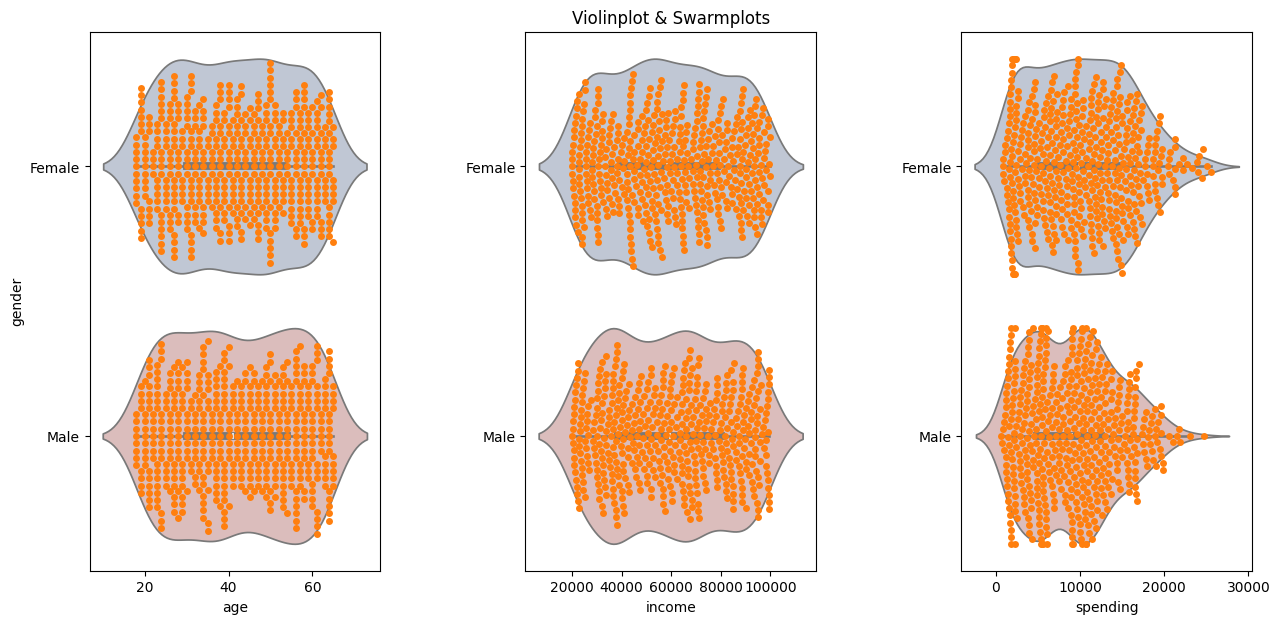

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for cols in ['age' , 'income' , 'spending']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'gender' , data = df)
    plt.ylabel('gender' if n == 1 else '')
    plt.title('Violinplot & Swarmplots' if n == 2 else '')
plt.show()

# 📦 Box Plot: Exploring Data Distribution and Outliers

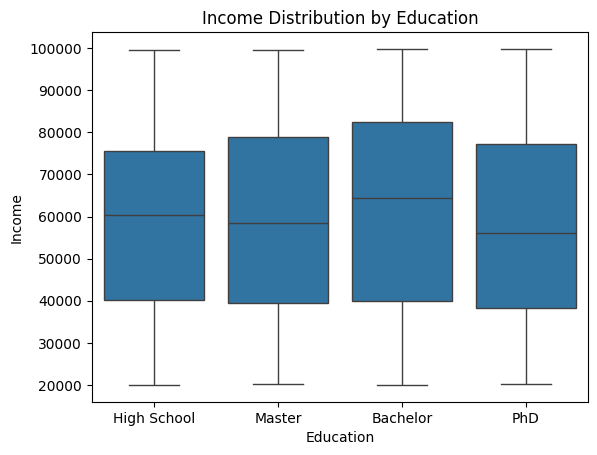

In [ ]:
sns.boxplot(x='education', y='income', data=df)
plt.title('Income Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

# 📊 Bar Plot: Representing Categorical Data with Bars

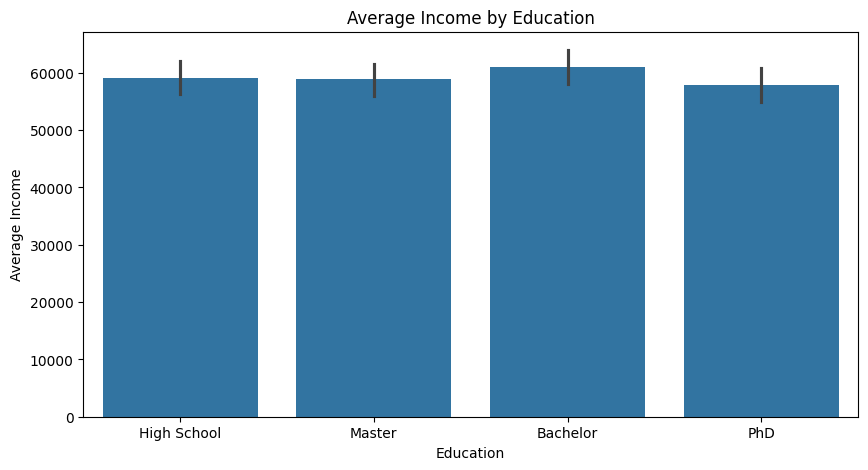

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='education', y='income', data=df)
plt.title('Average Income by Education')
plt.xlabel('Education')
plt.ylabel('Average Income')
plt.show()

## ➗ Linear Regression: Model Training and Evaluation


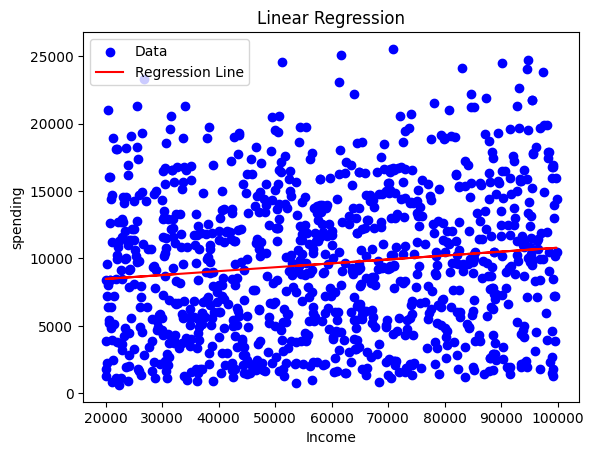

In [ ]:
x=df['income'].values.reshape(-1,1)
y=df['spending'].values.reshape(-1,1)

model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
coef=model.coef_[0]
intercept = model.intercept_

plt.scatter(x,y,color='blue',label='Data')
plt.plot(x,y_pred,color='red',label='Regression Line')
plt.xlabel('Income')
plt.ylabel('spending')
plt.title('Linear Regression')
plt.legend()

# 🔢 K-means Clustering: Algorithm Application and Visualization

Using K-Means clustering to group customers based on their behaviors.
1. Selecting Relevant Features: Focus on age, income and spending for clustering.
2. Standardizing the Data: Scaling the features to improve clustering results.

In [ ]:
features = df[['age', 'income', 'spending']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## 🔢Performing K-Means Clustering:

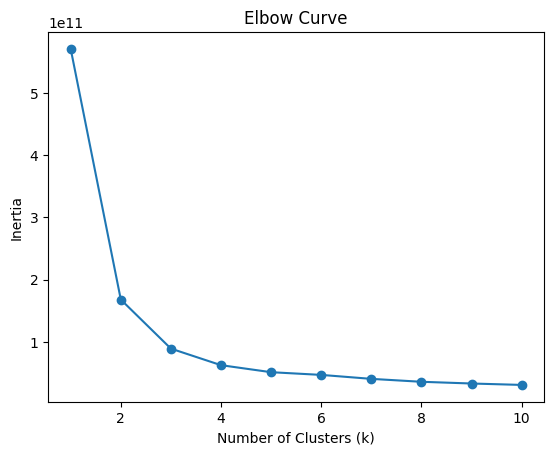

In [ ]:
X = df[['age', 'income', 'spending']].values

k_values = list(range(1, 11))
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal k value
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# 📊Visualizing Clusters using Scater Plot for Customer Segments





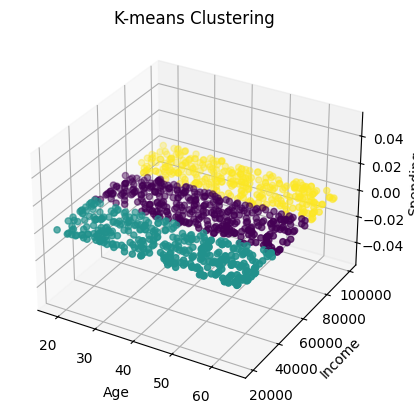

In [ ]:
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
df['Cluster'] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending')
ax.set_title('K-means Clustering')

plt.show()

In [ ]:
fig = px.scatter_3d(df, x='age', y='income', z='spending', color='Cluster')

fig.update_layout(title='K-means Clustering',scene=dict(
    xaxis_title='Age',
    yaxis_title='Income',
    zaxis_title='Spending',
))
# fig.show(renderer='notebook')
fig.show()


# 📘Export Data for Power BI Vizualization and Presentation:

In [ ]:
df.to_csv('customer_segments.csv', index = False)

✨ Conclusion ✨

This project highlights the ability to analyze customer data and visualize insights using Power BI tool.

We have reached the end of this data analysis journey. By using data visualization techniques like scatter plots, count plots, box plots, violin plots, and swarm plots, we gained a visual understanding of the dataset. Applying machine learning algorithms such as linear regression and K-means clustering allowed us to make predictions and discover meaningful clusters. Feel free to further explore and build upon this analysis to drive valuable insights for own projects. Thank you for joining us on this data-driven adventure! 🚀🔬📈